In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

sns.set_style('darkgrid')

In [97]:
# read data
df = pd.read_csv('data.csv')
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Holidays,Monthly Visitors,Unemployment Rate,Avg Monthly Temperature
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,506811,24701,29290,Male,28,10813,Card,0,60416.67,5.4,6.5
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,506811,24701,27703,Male,27,9237,Card,0,60416.67,5.4,6.5
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,506811,24701,28712,Male,53,11242,Cash,0,60416.67,5.4,6.5
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,506811,24701,28020,Male,23,23327,Cash,0,60416.67,5.4,6.5
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,506811,24701,27182,Male,33,8536,Card,0,60416.67,5.4,6.5


In [98]:
df['Date of Travel'] = pd.to_datetime(df['Date of Travel'], format='%Y-%m-%d')
df.dtypes

Transaction ID                      int64
Date of Travel             datetime64[ns]
Company                            object
City                               object
KM Travelled                      float64
Price Charged                     float64
Cost of Trip                      float64
Profit                            float64
Population                          int64
Users                               int64
Customer ID                         int64
Gender                             object
Age                                 int64
Income (USD/Month)                  int64
Payment_Mode                       object
Holidays                            int64
Monthly Visitors                  float64
Unemployment Rate                 float64
Avg Monthly Temperature           float64
dtype: object

## Time Series Analysis

In [99]:
df.sort_values(by='Date of Travel', inplace=True, ignore_index=True)
df.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Holidays,Monthly Visitors,Unemployment Rate,Avg Monthly Temperature
0,10001340,2016-01-02,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,66.6760,705749,127001,52536,Male,24,10606,Card,0,174166.67,6.2,3.0
1,10000640,2016-01-02,Yellow Cab,CHICAGO IL,15.60,374.66,209.6640,164.9960,2693976,164468,4844,Male,32,5548,Cash,0,122166.67,5.9,-5.0
2,10000635,2016-01-02,Yellow Cab,CHICAGO IL,25.08,532.83,337.0752,195.7548,2693976,164468,5671,Male,24,7081,Cash,0,122166.67,5.9,-5.0
3,10001001,2016-01-02,Yellow Cab,NEW YORK NY,46.80,1391.91,595.2960,796.6140,8336817,302149,2761,Male,40,11462,Card,0,816666.67,4.9,0.5
4,10000171,2016-01-02,Pink Cab,SAN DIEGO CA,14.28,269.15,147.0840,122.0660,1423851,69995,20687,Male,39,8926,Cash,0,97416.67,5.5,15.0
5,10001009,2016-01-02,Yellow Cab,PHOENIX AZ,30.00,1000.52,403.2000,597.3200,1680992,6133,21481,Male,28,18030,Card,0,25083.33,5.5,14.0
6,10000605,2016-01-02,Yellow Cab,CHICAGO IL,35.52,760.86,430.5024,330.3576,2693976,164468,3251,Male,23,13077,Cash,0,122166.67,5.9,-5.0
7,10001014,2016-01-02,Yellow Cab,SACRAMENTO CA,38.00,1065.42,547.2000,518.2200,513624,7044,47687,Male,25,16088,Card,0,20083.33,5.5,9.0
8,10000600,2016-01-02,Yellow Cab,CHICAGO IL,23.75,531.25,336.3000,194.9500,2693976,164468,3363,Male,31,23320,Cash,0,122166.67,5.9,-5.0
9,10000182,2016-01-02,Pink Cab,SAN DIEGO CA,2.36,47.89,23.6000,24.2900,1423851,69995,18418,Male,39,13112,Cash,0,97416.67,5.5,15.0


In [100]:
# Let's examine Yellow Cab first
df_yellow = df.loc[df['Company']=='Yellow Cab',:]

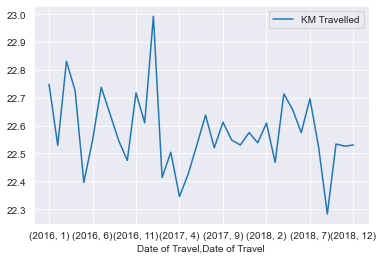

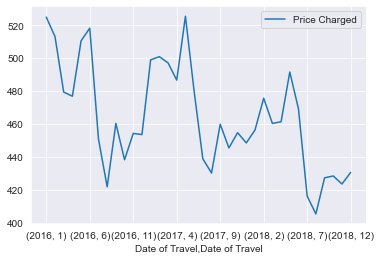

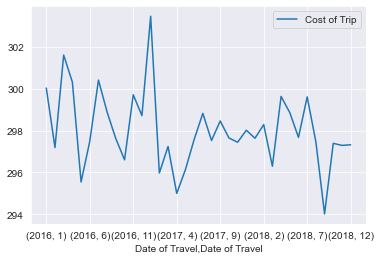

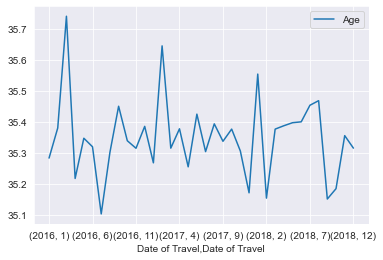

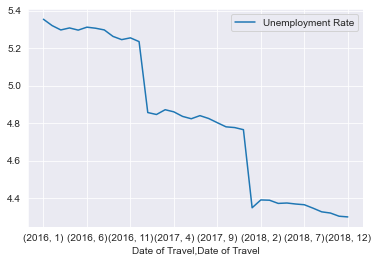

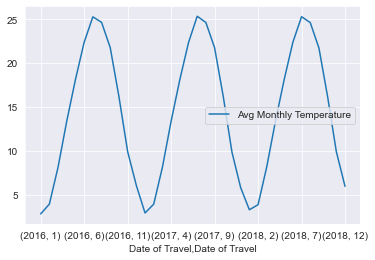

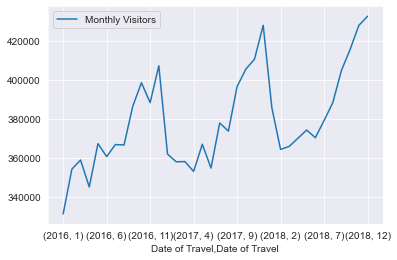

In [101]:
cols = ['KM Travelled','Price Charged','Cost of Trip','Age','Unemployment Rate','Avg Monthly Temperature','Monthly Visitors']

for col in cols:
    df_yellow.groupby([df_yellow['Date of Travel'].dt.year, df_yellow['Date of Travel'].dt.month])[col].mean().to_frame().plot()
    plt.show()

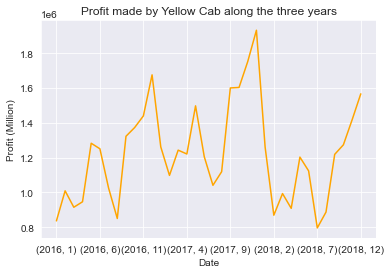

In [102]:
df_yellow.groupby([df_yellow['Date of Travel'].dt.year, df_yellow['Date of Travel'].dt.month])['Profit'].sum().to_frame().plot(
xlabel='Date',
ylabel='Profit (Million)',
title='Profit made by Yellow Cab along the three years',
legend=False,
color='orange')

plt.show()

In [103]:
# Create a dataframe for modelling
df_Ymodel = df_yellow.loc[:,['KM Travelled','Price Charged','Cost of Trip','Profit',
                            'Population','Users','Age','Income (USD/Month)','Holidays',
                            'Monthly Visitors','Unemployment Rate','Avg Monthly Temperature']]
df_Ymodel.index = df_yellow['Date of Travel']
df_Ymodel.head()

,KM Travelled,Price Charged,Cost of Trip,Profit,Population,Users,Age,Income (USD/Month),Holidays,Monthly Visitors,Unemployment Rate,Avg Monthly Temperature
Date of Travel,,,,,,,,,,,,
2016-01-02,10.20,202.54,135.8640,66.6760,705749,127001,24,10606,0,174166.67,6.2,3.0
2016-01-02,15.60,374.66,209.6640,164.9960,2693976,164468,32,5548,0,122166.67,5.9,-5.0
2016-01-02,25.08,532.83,337.0752,195.7548,2693976,164468,24,7081,0,122166.67,5.9,-5.0
2016-01-02,46.80,1391.91,595.2960,796.6140,8336817,302149,40,11462,0,816666.67,4.9,0.5
2016-01-02,30.00,1000.52,403.2000,597.3200,1680992,6133,28,18030,0,25083.33,5.5,14.0


In [104]:
df_Ymodel.head()

,KM Travelled,Price Charged,Cost of Trip,Profit,Population,Users,Age,Income (USD/Month),Holidays,Monthly Visitors,Unemployment Rate,Avg Monthly Temperature
Date of Travel,,,,,,,,,,,,
2016-01-02,10.20,202.54,135.8640,66.6760,705749,127001,24,10606,0,174166.67,6.2,3.0
2016-01-02,15.60,374.66,209.6640,164.9960,2693976,164468,32,5548,0,122166.67,5.9,-5.0
2016-01-02,25.08,532.83,337.0752,195.7548,2693976,164468,24,7081,0,122166.67,5.9,-5.0
2016-01-02,46.80,1391.91,595.2960,796.6140,8336817,302149,40,11462,0,816666.67,4.9,0.5
2016-01-02,30.00,1000.52,403.2000,597.3200,1680992,6133,28,18030,0,25083.33,5.5,14.0


In [105]:
# Check for stationary with Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

for col in df_Ymodel.columns:
    dickey_fuller_test = adfuller(df_Ymodel[col], autolag='AIC')
    print(col)
    print(dickey_fuller_test[0:4])

KM Travelled
(-525.9451998728092, 0.0, 0, 274680)
Price Charged
(-39.813994158113566, 0.0, 86, 274594)
Cost of Trip
(-525.6754781219306, 0.0, 0, 274680)
Profit
(-36.4499249085822, 0.0, 86, 274594)
Population
(-54.333834120740676, 0.0, 49, 274631)
Users
(-55.67106351780256, 0.0, 49, 274631)
Age
(-523.6191764482176, 0.0, 0, 274680)
Income (USD/Month)
(-525.3161832657667, 0.0, 0, 274680)
Holidays
(-24.416625180747214, 0.0, 85, 274595)
Monthly Visitors
(-52.95887987996354, 0.0, 49, 274631)
Unemployment Rate
(-24.168428161020643, 0.0, 87, 274593)
Avg Monthly Temperature
(-8.377766392279515, 2.558565554553538e-13, 87, 274593)


P-values are 0.000 for all the variables tested, thus we have stationary series and can move on to modelling.

## Modelling

In [106]:
# Split train and validation datasets
train = df_Ymodel[:int(0.8*(len(df_Ymodel)))]
validation = df_Ymodel[int(0.8*(len(df_Ymodel))):]

# Fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(train)
model_fit = model.fit()
model_fit.summary()

/Users/juancarlos/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 19, Mar, 2021
Time:                     14:29:24
--------------------------------------------------------------------
No. of Equations:         12.0000    BIC:                    87.1673
Nobs:                     219743.    HQIC:                   87.1622
Log likelihood:      -1.33179e+07    FPE:                7.13050e+37
AIC:                      87.1600    Det(Omega_mle):    -1.74038e+38
--------------------------------------------------------------------
Results for equation KM Travelled
                                coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------
const                             22.702758         0.223252          101.691           0.000
L1.KM Travelled                   -0.011110         0.019200           -0.579           0.563
L

In [107]:
# These are our train values in an array
model_fit.endog

array([[ 1.0200000e+01,  2.0254000e+02,  1.3586400e+02, ...,
         1.7416667e+05,  6.2000000e+00,  3.0000000e+00],
       [ 1.5600000e+01,  3.7466000e+02,  2.0966400e+02, ...,
         1.2216667e+05,  5.9000000e+00, -5.0000000e+00],
       [ 2.5080000e+01,  5.3283000e+02,  3.3707520e+02, ...,
         1.2216667e+05,  5.9000000e+00, -5.0000000e+00],
       ...,
       [ 2.7750000e+01,  6.7552000e+02,  3.7296000e+02, ...,
         8.7975000e+05,  4.1000000e+00,  2.6000000e+01],
       [ 4.1600000e+01,  6.7911000e+02,  5.6409600e+02, ...,
         4.2275000e+05,  4.3000000e+00,  2.3500000e+01],
       [ 1.3720000e+01,  3.2021000e+02,  1.8604320e+02, ...,
         8.7975000e+05,  4.1000000e+00,  2.6000000e+01]])

In [108]:
# Predict on validation set
prediction = model_fit.forecast(model_fit.endog, steps=len(validation))

In [109]:
validation.index

DatetimeIndex(['2018-07-12', '2018-07-12', '2018-07-12', '2018-07-12',
               '2018-07-12', '2018-07-12', '2018-07-12', '2018-07-12',
               '2018-07-12', '2018-07-12',
               ...
               '2018-12-31', '2018-12-31', '2018-12-31', '2018-12-31',
               '2018-12-31', '2018-12-31', '2018-12-31', '2018-12-31',
               '2018-12-31', '2018-12-31'],
              dtype='datetime64[ns]', name='Date of Travel', length=54937, freq=None)

In [110]:
validation.shape

(54937, 12)

In [111]:
prediction.shape

(54937, 12)

In [112]:
# Present the forecasted values in a more elegant way
forecast = pd.DataFrame(prediction, index=validation.index, columns=validation.columns)
forecast.head()

,KM Travelled,Price Charged,Cost of Trip,Profit,Population,Users,Age,Income (USD/Month),Holidays,Monthly Visitors,Unemployment Rate,Avg Monthly Temperature
Date of Travel,,,,,,,,,,,,
2018-07-12,22.614961,472.542067,298.555452,173.986616,5.025789e+06,200881.371596,35.291289,15068.450700,0.000071,515003.282752,4.578713,25.493166
2018-07-12,22.545513,461.209787,297.641067,163.568720,4.124481e+06,174571.605041,35.325359,15041.535610,0.000117,413458.739567,4.771008,24.451077
2018-07-12,22.545938,458.812810,297.631987,161.180823,3.882848e+06,167929.128980,35.334550,15034.760347,0.000153,385445.571015,4.849880,23.363587
2018-07-12,22.549097,458.866618,297.670567,161.196052,3.821716e+06,166432.999974,35.338176,15032.432310,0.000192,378061.206648,4.883055,22.347544
2018-07-12,22.552795,459.581367,297.718844,161.862523,3.808991e+06,166244.580260,35.340116,15032.011089,0.000238,376393.091825,4.897370,21.427755


In [113]:
forecast.shape

(54937, 12)

In [114]:
# Measuring the errors
from sklearn.metrics import mean_squared_error

for col in validation.columns:
    print(f'The RMSE for {col} is {np.sqrt(mean_squared_error(forecast[col], validation[col]))}')

The RMSE for KM Travelled is 12.267086224793731
The RMSE for Price Charged is 263.23239777323334
The RMSE for Cost of Trip is 163.03087395695832
The RMSE for Profit is 145.7485519841686
The RMSE for Population is 3240973.010770731
The RMSE for Users is 103147.88048444666
The RMSE for Age is 12.547697387554626
The RMSE for Income (USD/Month) is 7968.761113093356
The RMSE for Holidays is 0.16258283245521812
The RMSE for Monthly Visitors is 347322.2957689228
The RMSE for Unemployment Rate is 0.8552286660317134
The RMSE for Avg Monthly Temperature is 8.418635223309902


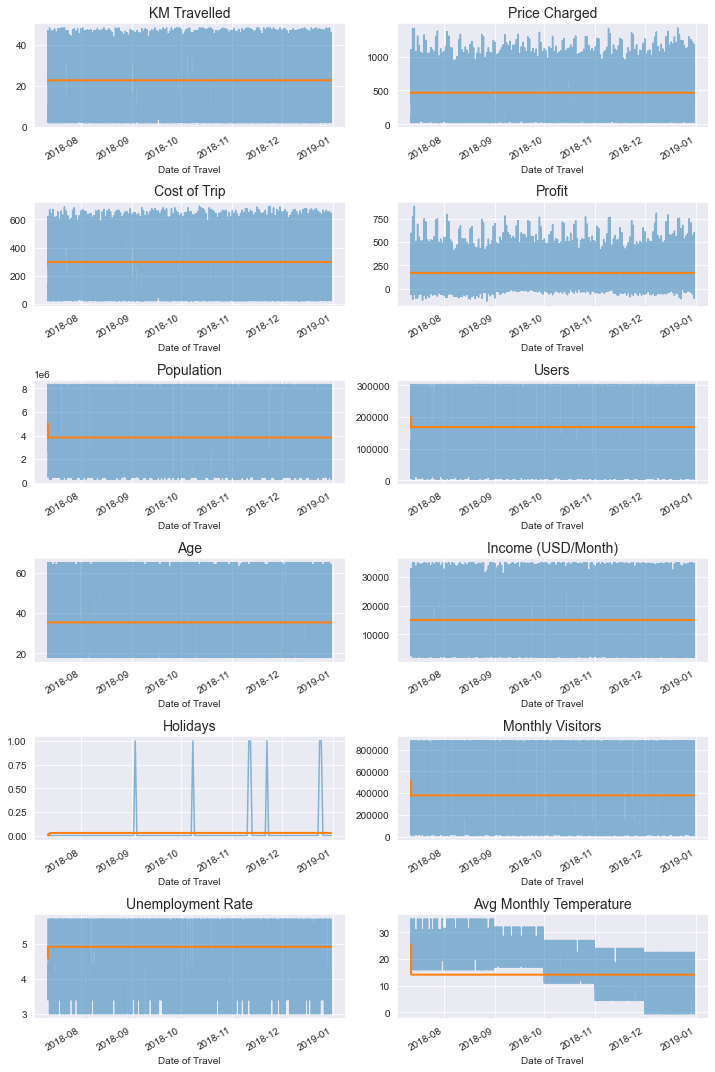

In [115]:
# Visualizing values vs. predicted (orange line)
cols = [col for col in validation.columns]

fig = plt.figure(figsize=(10,15))

count=1

for col in cols:
    fig.add_subplot(6,2,count)
    validation[col].plot(alpha=.5)
    forecast[col].plot(linewidth=2)
    plt.tight_layout()
    plt.title(col, fontsize=14)
    
    count+=1

plt.show()

In [116]:
# Create a grouped dataframe year and month-wise
df_grouped = df_Ymodel.groupby([df_Ymodel.index.year, df_Ymodel.index.month])[df_Ymodel.columns].mean()

In [117]:
# Make predictions for 2019
model = VAR(df_grouped)
model_fit = model.fit()
predictions2019 = model_fit.forecast(model_fit.endog, steps=12)
print(predictions2019)

[[ 2.26024493e+01  4.51071116e+02  2.98156466e+02  1.52914651e+02
   3.98259366e+06  1.71733913e+05  3.52647632e+01  1.50438935e+04
   8.19019143e-02  4.16202139e+05  4.18427291e+00  1.20562669e+00]
 [ 2.25779305e+01  4.64284016e+02  2.97810932e+02  1.66473085e+02
   3.86593060e+06  1.70083480e+05  3.53749492e+01  1.50733014e+04
   5.53495277e-02  4.03590779e+05  4.10535226e+00 -5.04141810e-01]
 [ 2.25764378e+01  4.71117610e+02  2.97838595e+02  1.73279016e+02
   3.73566797e+06  1.67494295e+05  3.53837475e+01  1.50219517e+04
   3.76577219e-02  3.90412302e+05  4.04669941e+00  8.50718926e-01]
 [ 2.25504749e+01  4.74742054e+02  2.97483677e+02  1.77258377e+02
   3.62616525e+06  1.65048636e+05  3.53859121e+01  1.50052585e+04
   1.84412122e-02  3.79106283e+05  4.00848744e+00  4.86872531e+00]
 [ 2.25219366e+01  4.71993814e+02  2.97097219e+02  1.74896595e+02
   3.58779314e+06  1.63902500e+05  3.53771497e+01  1.49824100e+04
  -5.02442105e-04  3.74680007e+05  4.01058227e+00  1.03507293e+01]
 [ 2.

/Users/juancarlos/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [118]:
# Convert predictions array into a dataframe
forecast = pd.DataFrame(predictions2019, index=range(1,13), columns=df_grouped.columns)
forecast.head()

,KM Travelled,Price Charged,Cost of Trip,Profit,Population,Users,Age,Income (USD/Month),Holidays,Monthly Visitors,Unemployment Rate,Avg Monthly Temperature
1,22.602449,451.071116,298.156466,152.914651,3.982594e+06,171733.913280,35.264763,15043.893500,0.081902,416202.139124,4.184273,1.205627
2,22.577930,464.284016,297.810932,166.473085,3.865931e+06,170083.480395,35.374949,15073.301424,0.055350,403590.778853,4.105352,-0.504142
3,22.576438,471.117610,297.838595,173.279016,3.735668e+06,167494.295285,35.383748,15021.951727,0.037658,390412.302291,4.046699,0.850719
4,22.550475,474.742054,297.483677,177.258377,3.626165e+06,165048.635956,35.385912,15005.258519,0.018441,379106.282984,4.008487,4.868725
5,22.521937,471.993814,297.097219,174.896595,3.587793e+06,163902.500144,35.377150,14982.410011,-0.000502,374680.006852,4.010582,10.350729


<Figure size 720x1080 with 0 Axes>

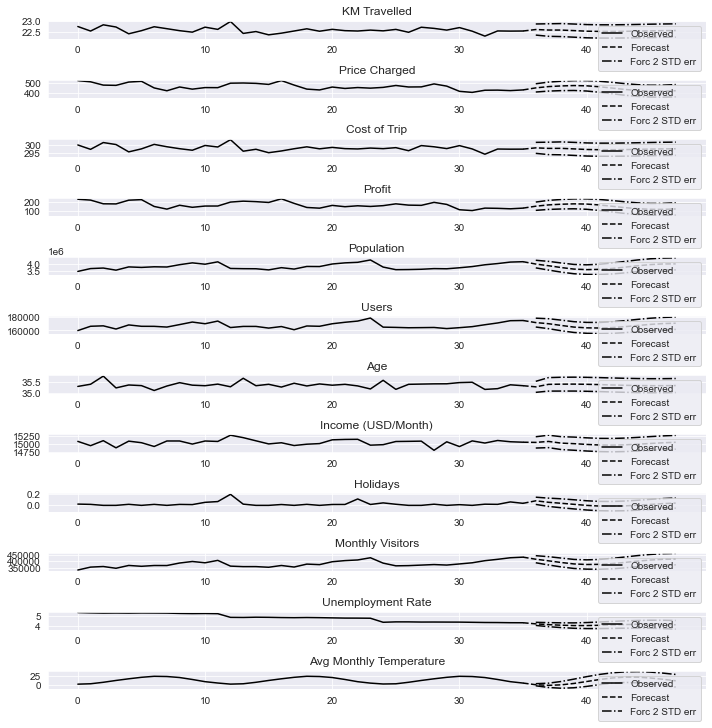

In [119]:
fig = plt.figure(figsize=(10,15))
model_fit.plot_forecast(12)
plt.tight_layout()
plt.show()

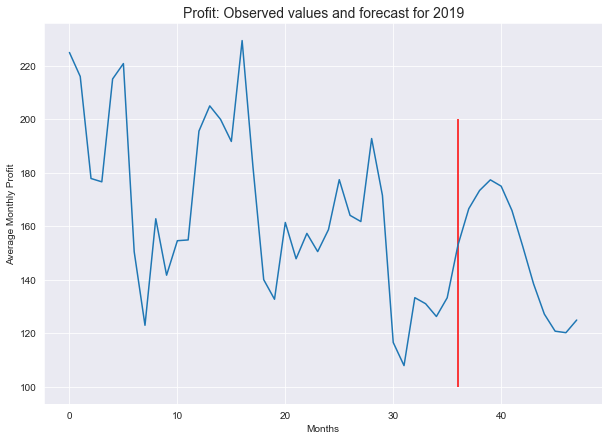

In [120]:
p = pd.concat([df_grouped.Profit, forecast.Profit], ignore_index=True)
plt.figure(figsize=(10,7))
plt.plot(p)
plt.vlines(x=36, color='red', ymin=100, ymax=200)
plt.title('Profit: Observed values and forecast for 2019', fontsize=14)
plt.xlabel('Months')
plt.ylabel('Average Monthly Profit')
plt.show()

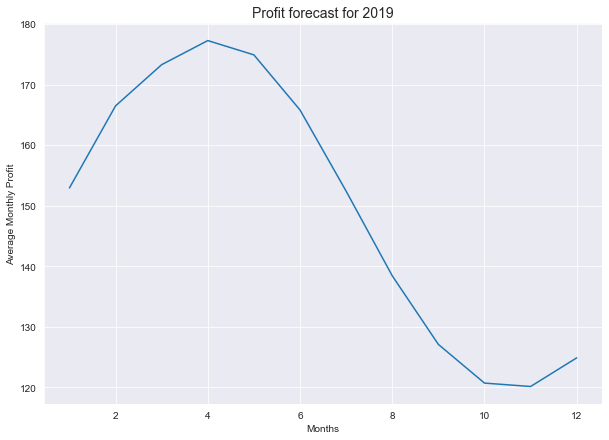

In [121]:
plt.figure(figsize=(10,7))
sns.lineplot(data=forecast, y='Profit', x=forecast.index)
plt.title('Profit forecast for 2019', fontsize=14)
plt.xlabel('Months')
plt.ylabel('Average Monthly Profit')
plt.show()

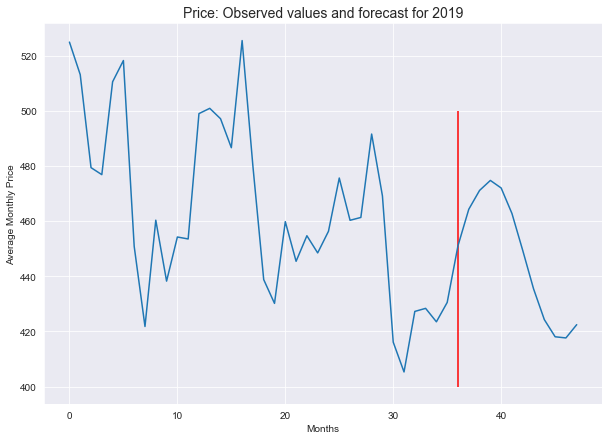

In [122]:
pr = pd.concat([df_grouped['Price Charged'], forecast['Price Charged']], ignore_index=True)
plt.figure(figsize=(10,7))
plt.plot(pr)
plt.vlines(x=36, color='red', ymin=400, ymax=500)
plt.title('Price: Observed values and forecast for 2019', fontsize=14)
plt.xlabel('Months')
plt.ylabel('Average Monthly Price')
plt.show()

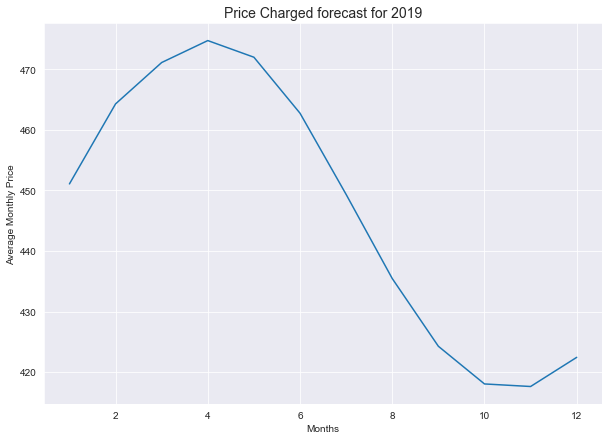

In [123]:
plt.figure(figsize=(10,7))
sns.lineplot(data=forecast, y='Price Charged', x=forecast.index)
plt.title('Price Charged forecast for 2019', fontsize=14)
plt.xlabel('Months')
plt.ylabel('Average Monthly Price')
plt.show()

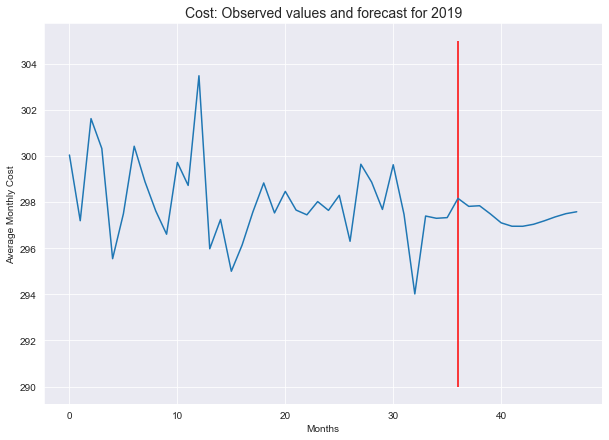

In [124]:
c = pd.concat([df_grouped['Cost of Trip'], forecast['Cost of Trip']], ignore_index=True)
plt.figure(figsize=(10,7))
plt.plot(c)
plt.vlines(x=36, color='red', ymin=290, ymax=305)
plt.title('Cost: Observed values and forecast for 2019', fontsize=14)
plt.xlabel('Months')
plt.ylabel('Average Monthly Cost')
plt.show()

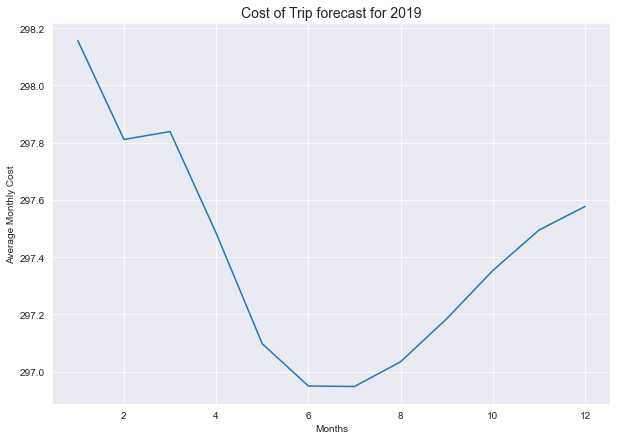

In [125]:
plt.figure(figsize=(10,7))
sns.lineplot(data=forecast, y='Cost of Trip', x=forecast.index)
plt.title('Cost of Trip forecast for 2019', fontsize=14)
plt.xlabel('Months')
plt.ylabel('Average Monthly Cost')
plt.show()